
<font size="5"><strong>Microsoft Movie Studio Insights for movie Creation</strong></font>

<img src ="microsoft.png" style ="object-fit:contain;
            width:800px;
            height:300px;
            border: solid 1px #CCC">

<font size="5"><strong>Overview</strong></font>

<p>This project analyzes the various types of movie genres to determine the most preferred  and how much revenue they produce for a studio.The exploratory data analysis shows that Action movies produce the most revenue,followed by Commedy, Sci-Fi and Fantasy. Western has the least revenue. Microsoft can use this analysis to create movies that will bring more revenue, and employ marketing strategic marketing skills to increase income on genres that have high rating, but low revenue </p>

<font size="5"><strong>Businsess Problem</strong></font>
<p>Microsoft have started a movie studio business and would like to know the kinds of movies that are performing exceptionally at the box office.</p>
<p>Using the existing data on imdb.title.basics,imdb.title.ratings,bom.movie_gross, I explore the types of films that are doing well in the market in terms of their ratings and the revenue they bring back to the companies on a yearly basis.</p>

<font size = "5"><strong>Data Understanding</strong></font>


<font size = "3">Check the shape, general infornation about the data sets such as data types overall number of columns and rows:</font>
    

<p>Import the necessary data manipulation and visualization libraries i.e. pandas, matloplib, requests, beautiful Soup and zip</p>

In [83]:
#import pandas for data manipulation
import pandas as pd
#import numpy as np
import numpy as np
#import stats
from scipy import stats
#matplotlib for visualizations
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)
plt.style.available
%matplotlib inline
import seaborn as sns
#beatutiful soup for webscraping
from bs4 import BeautifulSoup
# use os to defining paths
import os

In [84]:
plt.style.use('ggplot')

<font size = "4">Unzip the csv files below and load them into dataset variables and inspect the first 5 rows :</font>
<ul>
    <li>imdb.title.basics</li>
    <li>imdb.title.ratings</li>
    <li>bom.movie_gross</li>
</ul>

In [85]:
#load the titles csv,
# get the path to the tites csv and assign it to a variable
file_titles = './zippedData/imdb.title.basics.csv.gz'
#check whether the loaded file path points to  regular file 
print(os.path.isfile(file_titles))
#read the file and assign it to dataframe variable 
df_titles = pd.read_csv(file_titles, compression='gzip')
#check the first 5 elements of the dataframe


True


In [86]:
#import the ratings csv
file_ratings = './zippedData/imdb.title.ratings.csv.gz'
#check whether the loaded file path points to  regular file
print(os.path.isfile(file_ratings))
#read the file and assign it to dataframe variable 
df_ratings = pd.read_csv(file_ratings, compression='gzip')
#check the first 5 elements of the dataframe


True


In [87]:
#import the movie gross csv
file_movies = './zippedData/bom.movie_gross.csv.gz'
#check whether the loaded file path points to  regular file
print(os.path.isfile(file_movies))
#read the file and assign it to dataframe variable 
df_gross = pd.read_csv(file_movies, compression='gzip')
#check the first 5 elements of the dataframe


True


<font size="5">Movie Titles Data</font>

In [88]:
#check the first 5 elements of the df_titles data
df_titles.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [89]:
#check the general information of  the df_titles
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [90]:
#check for the statistical summary
df_titles.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


<font size="5">Movie Ratings Data</font>

In [91]:
#preview the first 5 rows
df_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [92]:
#check summary information of the data
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [93]:
#check for the statistical summary
df_titles.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


<font size="5">Movie Gross income Data</font>

In [94]:
#preview the first 5 rows
df_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [95]:
#check summary information of the data
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [96]:
#check for the statistical summary
df_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


 <font size="5"><strong>Data Preparation</strong></font>

<p>In my data exploration, I will factor in the genre, rating,and gross income(foreign and domestic) to make recommendations</p>


<font size ="5">Check and handle for missing values in the 3 data sets i.e</font>
<ul>
    <li>df_titles</li>
    <li>df_ratings</li>
    <li>df_gross</li>
</ul>


<strong>Movie Titles</strong>

In [97]:
#check for  missing values in df_titles
df_titles.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


The <strong>primary_title</strong> column doesnt have missing values but the <strong>original_title</strong> has 21 missing out of 146144 rows of the entire dataset.In this case drop the missing rows.


Delete null values because imputation renders the values incorrect since every film type has a specific run time, genre and name

In [98]:
#create a new dataframe with no missing values
df_titles_clean = df_titles.dropna()

In [99]:
#check for null values again in the new data set
df_titles_clean.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [100]:
#check the structure of the df_titles_clean data frame
df_titles_clean

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [101]:
#check for duplicates
df_titles_clean.duplicated().sum()

0

In [102]:
'the df_titles_clean doesnt have duplicates'

'the df_titles_clean doesnt have duplicates'

In [103]:
#check the general information
df_titles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


<strong>Movie Ratings</strong>

In [104]:
#check for  missing values in df_titles
df_ratings.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [105]:
'The ratings data set does not have misssing values'

'The ratings data set does not have misssing values'

In [106]:
#check for duplicates
df_ratings.duplicated().sum()

0

In [107]:
'The ratings data set does not have duplicated values'

'The ratings data set does not have duplicated values'

<strong>Movies Gross Income</strong>

In [108]:
#check for missing values
df_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [109]:
#check the data types of columns
df_gross.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

As noted, from above there are missing values in <strong>domestic_gross, foreign_gross and studio</strong>.Impute the missing values in <strong>domestic_gross and foreign_gross</strong> then drop <strong>studio</strong>

It is also noted that the data type for <strong>foreign_gross</strong> is wrong, therefore needs to be changed from <strong>object</strong> to <strong>float64</strong>

In [110]:
#drop null values on studio column
df_gross_clean = df_gross.dropna(subset=['studio'])

In [111]:
#confirm the missing values on studio column have been dropped
df_gross_clean.isna().sum()

title                0
studio               0
domestic_gross      26
foreign_gross     1349
year                 0
dtype: int64

In [112]:
#convert the data type of foreign_gross column from object to 
df_gross_clean['foreign_gross'] = pd.to_numeric(df_gross_clean['foreign_gross'], errors = 'coerce')
df_gross_clean['foreign_gross']

<ipython-input-112-1db272634d6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gross_clean['foreign_gross'] = pd.to_numeric(df_gross_clean['foreign_gross'], errors = 'coerce')


0       652000000.0
1       691300000.0
2       664300000.0
3       535700000.0
4       513900000.0
           ...     
3382            NaN
3383            NaN
3384            NaN
3385            NaN
3386            NaN
Name: foreign_gross, Length: 3382, dtype: float64

In [113]:
#confirm the data type again
df_gross_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2028 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


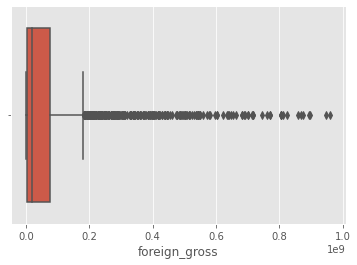

In [114]:
#impute the missing values in domestic_gross  and foreign_gross
# first check for the outliers in the two columns
sns.boxplot(x = df_gross_clean['foreign_gross'], data=df_gross_clean );


In [115]:
#check the percentage of outliers in the dataset
len(df_gross_clean.loc[df_gross_clean['foreign_gross']>200000000])*100/len(df_gross_clean['foreign_gross'])

6.859846244825547

'the outliers represent about 6.85884% of the foreign_gross column'. 'will use the median to replace missing values'

In [116]:
#fill the missing values with the mean
df_gross_clean['foreign_gross'] = df_gross_clean['foreign_gross'].fillna(df_gross_clean['foreign_gross'].median())
#confirm there aare no null values in foreign_gross column
df_gross_clean.isna().sum()

<ipython-input-116-10db7b56d745>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gross_clean['foreign_gross'] = df_gross_clean['foreign_gross'].fillna(df_gross_clean['foreign_gross'].median())


title              0
studio             0
domestic_gross    26
foreign_gross      0
year               0
dtype: int64

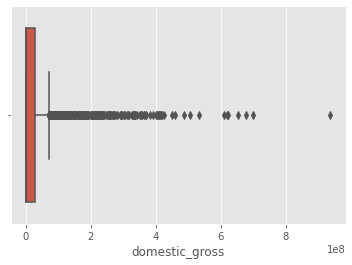

In [117]:
#check for outliers in the domestic gross using a seabon boxplot
sns.boxplot(x = df_gross_clean['domestic_gross'], data=df_gross_clean);


In [118]:
#check for the percentage of outliers
Q1 = df_gross_clean['domestic_gross'].quantile(.25)
Q3 = df_gross_clean['domestic_gross'].quantile(.75)
IQR = Q3-Q1
lower_range = Q1 - 1.5*IQR
upper_range = Q3 + 1.5*IQR
print(f"Lower quartile: {lower_range}")
print(f"Upper quartile: {upper_range}")

outlier_free_data = [x for x in df_gross_clean['domestic_gross'] if(x>lower_range)&(x<upper_range)]

filter_data = df_gross_clean['domestic_gross'].loc[df_gross_clean['domestic_gross'].isin(outlier_free_data)]
len(filter_data)*100/len(df_gross_clean['domestic_gross'])

Lower quartile: -41625000.0
Upper quartile: 69695000.0


87.22649319929036

In [119]:
Q1 = df_gross_clean['foreign_gross'].quantile(.25)
Q3 = df_gross_clean['foreign_gross'].quantile(.75)
IQR = Q3-Q1
lower_range = Q1 - 1.5*IQR
upper_range = Q3 + 1.5*IQR
print(f"Lower quartile: {lower_range}")
print(f"Upper quartile: {upper_range}")

outlier_free_data = [x for x in df_gross_clean['foreign_gross'] if(x>lower_range)&(x>upper_range)]

filter_outlier_data = df_gross_clean['foreign_gross'].loc[df_gross_clean['foreign_gross'].isin(outlier_free_data)]
len(filter_outlier_data )*100/len(df_gross_clean['foreign_gross'])

Lower quartile: -14012500.0
Upper quartile: 55087500.0


18.302779420461267

In [120]:
df_gross_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 158.5+ KB


In [121]:
df_gross_clean.isna().sum()

title              0
studio             0
domestic_gross    26
foreign_gross      0
year               0
dtype: int64

In [122]:
df_gross_clean['domestic_gross'] = df_gross_clean['domestic_gross'].fillna(df_gross_clean['domestic_gross'].median()) 

<ipython-input-122-a6780c47bda6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gross_clean['domestic_gross'] = df_gross_clean['domestic_gross'].fillna(df_gross_clean['domestic_gross'].median())


In [123]:
df_gross_clean.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [124]:
df_gross_clean

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,19000000.0,2018
3383,Edward II (2018 re-release),FM,4800.0,19000000.0,2018
3384,El Pacto,Sony,2500.0,19000000.0,2018
3385,The Swan,Synergetic,2400.0,19000000.0,2018


<font size="5"><strong>Dataset Merging</strong></font>

<p>To get the movies ratings we have to merge the movies titles and ratings datasets into a single dataset</p>

In [125]:
#create a new dataset and of merged datasets
df_title_ratings = df_titles_clean.merge(df_ratings)

In [126]:
#preview the joined dataset
df_title_ratings 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [127]:
#check for null values
df_title_ratings.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

<font size="5"><strong>Exploratory Data Analysis</strong></font>

<p>check movie distribution</p>

In [128]:
df_title_ratings['genre_cat'] = df_title_ratings['genres'].apply(lambda x: 'Horror' if 'Horror' in x 
                                                                else('Documentary' if 'Documentary' in x
                                                                else('Drama' if 'Drama' in x 
                                                                else('Action' if 'Action' in x
                                                                else('Sci-Fi' if 'Sci-Fi' in x
                                                                else('Romance' if 'Romance' in x
                                                                else('Mystery' if 'Mystery' in x
                                                                else('Thriller' if 'Thriller' in x
                                                                else('Comedy' if 'Comedy' in x
                                                                else('Western' if 'Western' in x
                                                                else('Fantasy')
                                                                    ))))))))))
df_title_ratings

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_cat
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Drama
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Comedy
...,...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365,Drama
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5,Documentary
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6,Documentary
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136,Drama


In [129]:
df_title_ratings['genre_cat'].value_counts()

Drama          25463
Documentary    16366
Horror          6917
Comedy          5978
Action          3587
Fantasy         2278
Romance         2105
Thriller        1679
Sci-Fi           670
Mystery          603
Western           74
Name: genre_cat, dtype: int64

In [130]:
#check confirm that all the rows  in the new columns are populated
df_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
 8   genre_cat        65720 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.0+ MB


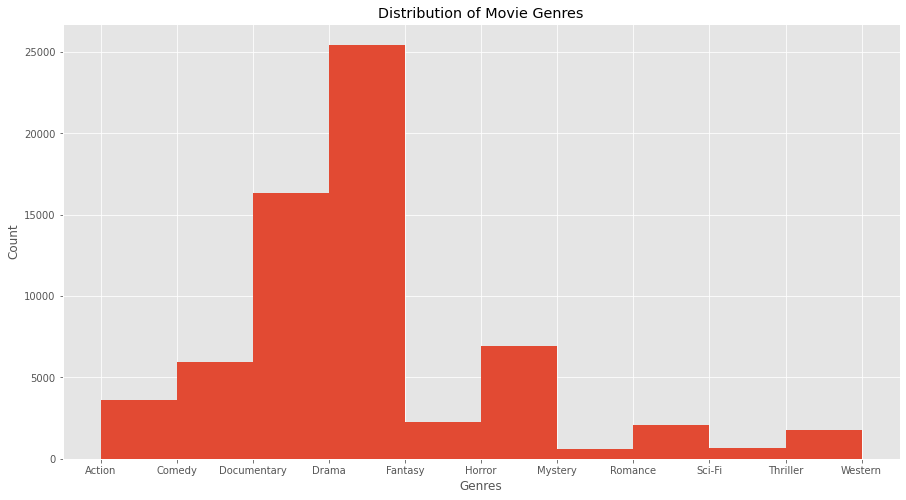

In [131]:
#check the distribution of movie genres 
fig, ax = plt.subplots(figsize=(15, 8))
df_title_ratings['genre_cat'].sort_values().hist()
ax.set_title('Distribution of Movie Genres')
ax.set_ylabel('Count')
ax.set_xlabel('Genres');

In [132]:
#get the percentage portitons of each genre
df_title_ratings['genre_cat'].value_counts(normalize=True)

Drama          0.387447
Documentary    0.249026
Horror         0.105250
Comedy         0.090962
Action         0.054580
Fantasy        0.034662
Romance        0.032030
Thriller       0.025548
Sci-Fi         0.010195
Mystery        0.009175
Western        0.001126
Name: genre_cat, dtype: float64

From the above film genres distribution, its noted that Drama has the highest frequecy of about 38.744% followed by Documentary which has a percentage of 24.90%. the last is Western with 0.11%

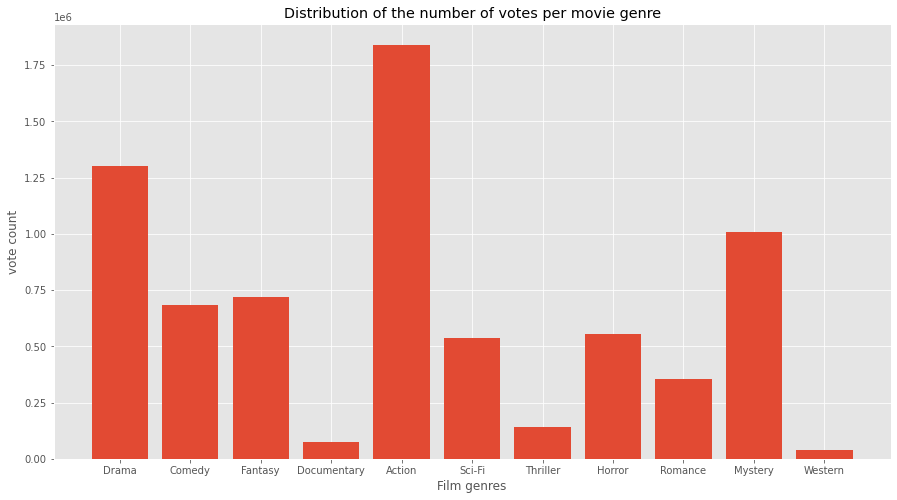

In [133]:
# check which films were most voted for.
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(df_title_ratings['genre_cat'],df_title_ratings['numvotes'])
ax.set_title('Distribution of the number of votes per movie genre')
ax.set_ylabel('vote count')
ax.set_xlabel('Film genres');



Action genre is the most voted for, with about 1,875,000 the least is Western genre

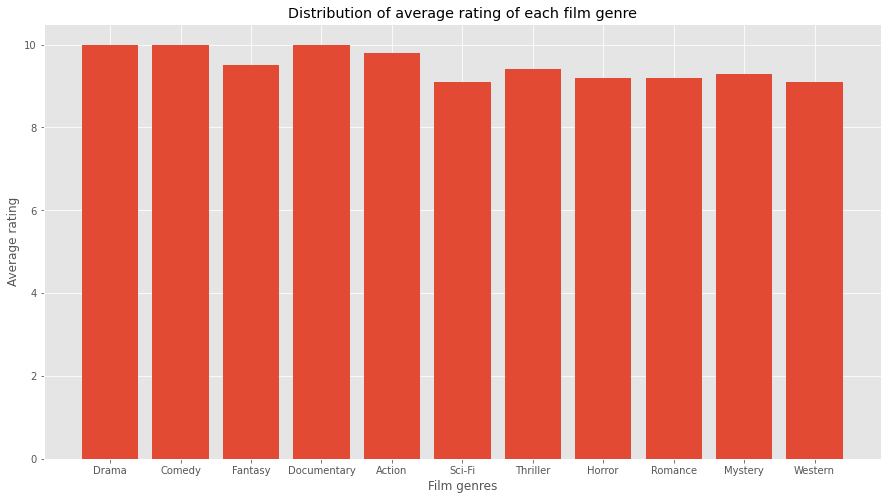

In [134]:
# chek the average rating of every film category 
fig, ax = plt.subplots(figsize=(15, 8))
ax.bar(df_title_ratings['genre_cat'],df_title_ratings['averagerating'])
ax.set_title('Distribution of average rating of each film genre')
ax.set_ylabel('Average rating')
ax.set_xlabel('Film genres');


Most films have a high rating of between 8 to 10. A scatter plot showing the relationship between the number of votes and the average rating of each film genre can help to understand the data better

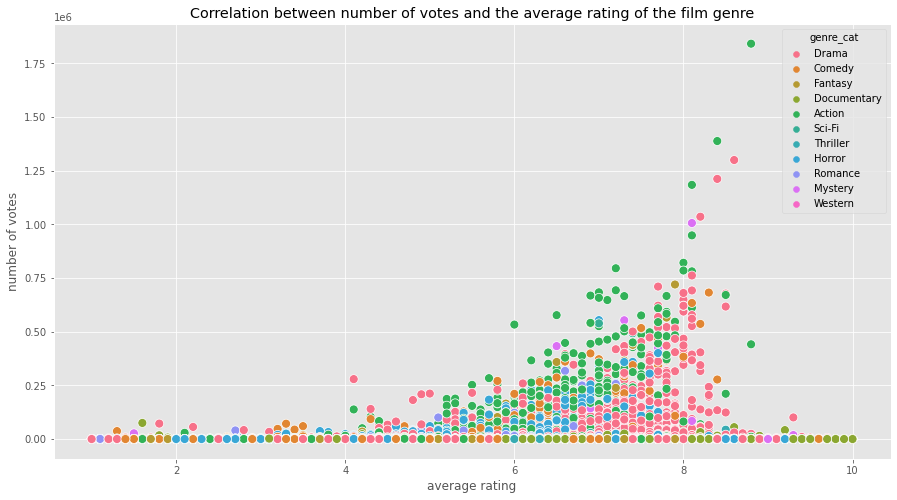

In [135]:
#check the relationship between number of votes and rating
fig, ax = plt.subplots(figsize=(15, 8))
# ax.scatter(df_title_ratings['averagerating'],df_title_ratings['numvotes'], hue=df_title_ratings['genre_cat'])
sns.scatterplot(data=df_title_ratings, x="averagerating", y="numvotes",hue="genre_cat", s=80)
ax.set_title('Correlation between number of votes and the average rating of the film genre')
ax.set_ylabel('number of votes')
ax.set_xlabel('average rating');


From the the above visualization, there is a positive correlation between average rating and the number of votes for different  genres especially action, drama and comedy.

<font size ="5"><strong>Merging the movie titles rating dataset with the gross income rating</strong></font>

In order to understand the revenue brought in by the type of genre, combine our gross income (<strong>df_gross_clean</strong> )dataset with the <strong>df_title rating</strong> dataset

In [136]:
'''the two data sets have contain movie title names, but the columns have different names
on one dataset its called primary_title and on another its called title.
will rename the primary_title to title
'''
#rename the primary_title in the df_title_ratings
df_title_ratings.rename(columns={'primary_title':'title'}, inplace=True)
#preview dataframe
df_title_ratings.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_cat
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Drama
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Drama
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,Drama
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263,Comedy


In [137]:
#merge the df_title_ratings dataframe with df_gross_clean
df_title_rating_gross = df_title_ratings.merge(df_gross_clean)
#preview the first 5 elements
df_title_rating_gross.head()

,tconst,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genre_cat,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Drama,Relbig.,1100000.0,19000000.0,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,Drama,IFC,744000.0,8000000.0,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,Drama,IFC,744000.0,8000000.0,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,Drama,IFC,744000.0,8000000.0,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Drama,Fox,58200000.0,129900000.0,2013


<font size = "5"><strong>Data visualization for movies domestic and foreign gross revenue</strong></font>

Explore revenue distribution for film genres

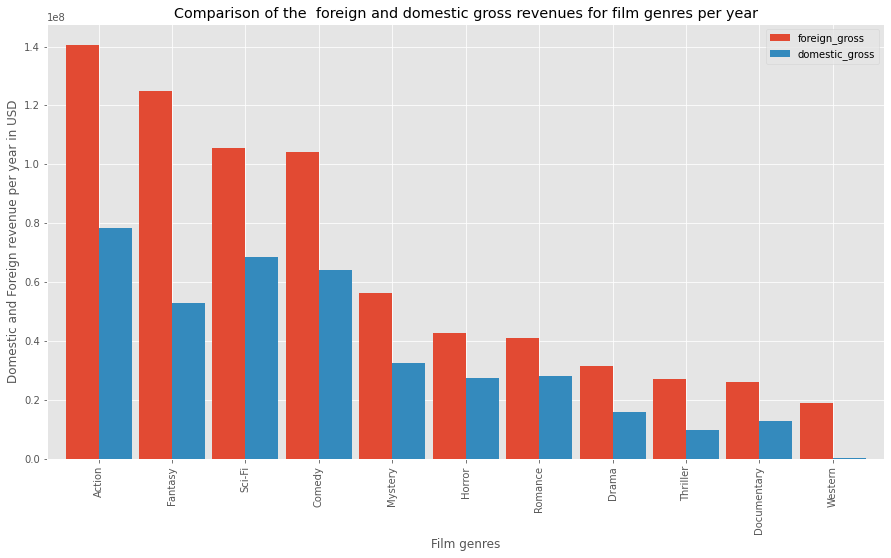

In [138]:
# check which films were most voted for.
df_title_rating_gross.groupby(['genre_cat'])[['foreign_gross','domestic_gross']].mean().sort_values(by='foreign_gross',ascending=False).plot( kind = 'bar', figsize=(15, 8),width=0.9)
plt.title('Comparison of the  foreign and domestic gross revenues for film genres per year')
plt.ylabel('Domestic and Foreign revenue per year in USD')
plt.xlabel('Film genres');

It's noted that all film genres have notably more foreign revenue compared to domestic.Action genre produces the highest revenue in both foreign and domestic(an average of approximately USD 140 million for foreign and USD 69 million  for domestic) per year. The least foreign revenue is produced by western genre(an average of about USD 30 million). The least domestic revenue is equally produced by western genre(an average of about USD 1 million)

<strong>Explore the relationship between film average rating and the gross revenue<strong>

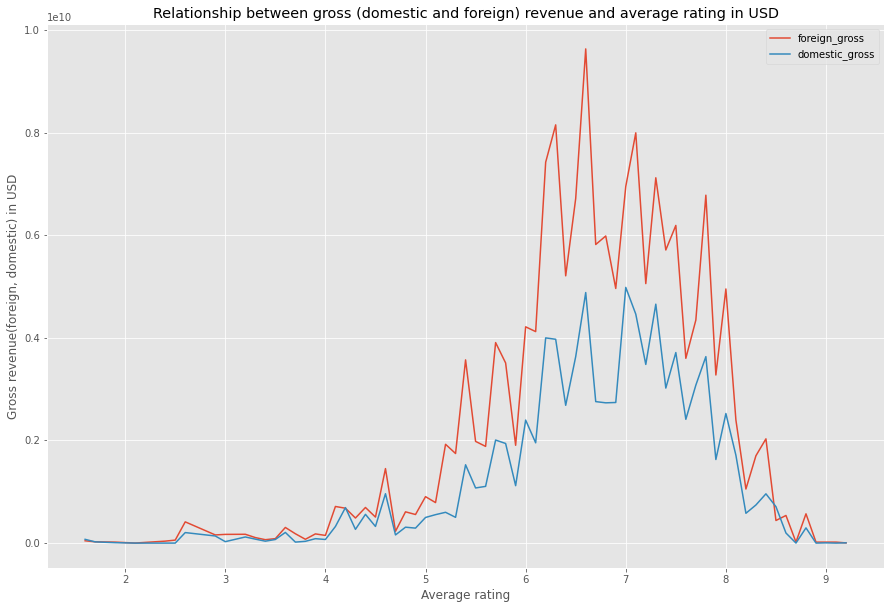

In [139]:
#create new data frame that contains film ratings, domestic and forein revenue
df_title_rating_gross.groupby('averagerating')[['foreign_gross','domestic_gross']].sum().plot(figsize=(15,10))
plt.title('Relationship between gross (domestic and foreign) revenue and average rating in USD')
plt.ylabel('Gross revenue(foreign, domestic) in USD')
plt.xlabel('Average rating');


Films with least average ratings(1-4) earn less revenue compared to films with higher ratings (4-7.5) which show raising revenue trend. Films with higest average rating shows declining revenues with increasing average rating.

<font size="5"><strong>Conclusions</strong></font>

<p>This analysis leads to three recommendations Microsoft's new movie studio business </p>

<ul>
    <li>Create more Action, sci-Fi, Commedy, Fantasy and mystery as they produce the highest revenue</li>
    <li>Venture into foreign markets for their films as foreign markets produce more revenue compared to domestic markets</li>
    <li>Some movies rate very high yet they earn low revenue, if better marketing skills are employed they could produce high revenues</li>
<ul>